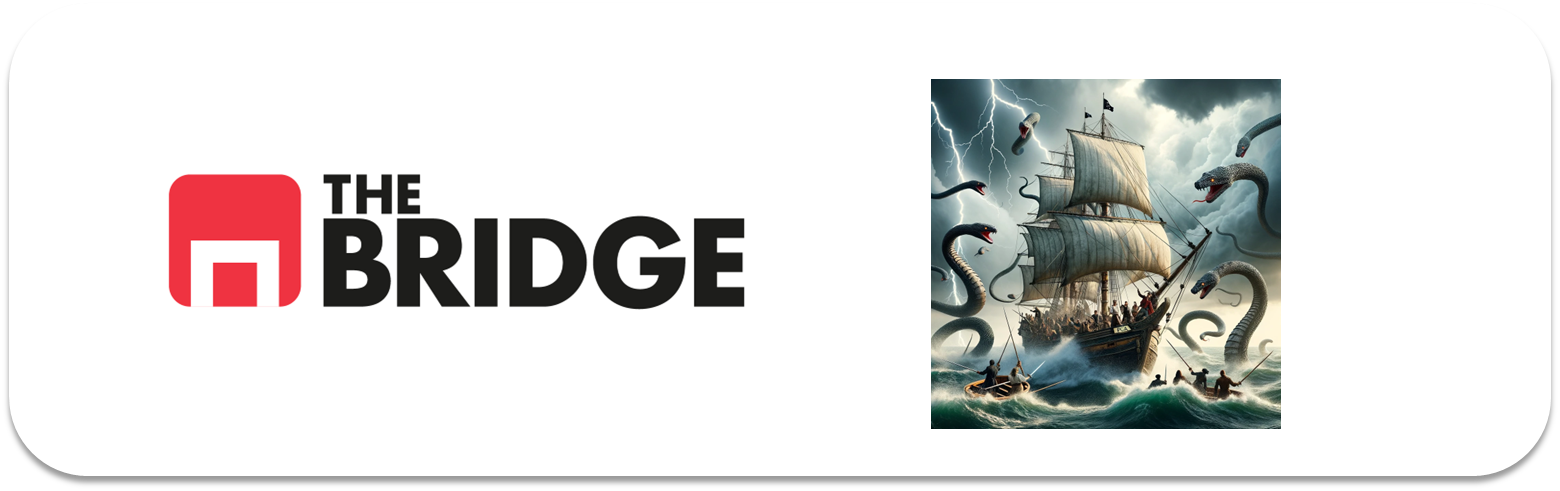

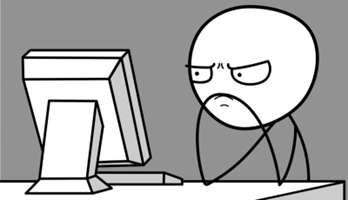

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Librerías para selección de características
from sklearn.feature_selection import SelectKBest, f_classif

# Librerías para pruebas estadísticas
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
from scipy.stats import ttest_ind, f_oneway


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score


# Librerías para reducción de dimensionalidad
from sklearn.decomposition import PCA

# Librerías para seleccionar features a través de ML
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold



from pprint import pprint

from toolbox_DS import *

pd.option_context('mode.use_inf_as_na', True)

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df= pd.read_csv('./data/breastcancer-winsconsin.csv',index_col=0)
df.head(8)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
843786           M        12.45         15.70           82.57      477.1   
844359           M        18.25         19.98          119.60     1040.0   
84458202         M        13.71         20.83           90.20      577.9   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
843786            0.12780           0.17000         0.15780   
844359            0.09463           0.10900         0.11270   
84458202          0.11890           0.16450         0.09366   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   
843786                0.08089         0.2087  ...          23.75   
844359                0.07400         0.1794  ...          27.66   
84458202              0.05985         0.2196  ...          28.14   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   
843786             103.40       741.6            0.1791             0.5249   
844359             153.20      1606.0            0.1442             0.2576   
84458202           110.60       897.0            0.1654             0.3682   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   
843786             0.5355                0.1741          0.3985   
844359             0.3784                0.1932          0.3063   
84458202           0.2678                0.1556          0.3196   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  
843786                    0.12440          NaN  
844359                    0.08368          NaN  
84458202                  0.11510          

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [4]:
df = df.drop(columns=('Unnamed: 32'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
describe_df(df).T

DATE_TYPE MISSINGS (%) UNIQUE_VALUES CARDIN (%)
diagnosis                  object          0.0             2       0.35
radius_mean               float64          0.0           456      80.14
texture_mean              float64          0.0           479      84.18
perimeter_mean            float64          0.0           522      91.74
area_mean                 float64          0.0           539      94.73
smoothness_mean           float64          0.0           474       83.3
compactness_mean          float64          0.0           537      94.38
concavity_mean            float64          0.0           537      94.38
concave points_mean       float64          0.0           542      95.25
symmetry_mean             float64          0.0           432      75.92
fractal_dimension_mean    float64          0.0           499       87.7
radius_se                 float64          0.0           540       94.9
texture_se                float64          0.0           519      91.21
perimeter_se              float64          0.0           533      93.67
area_se                   float64          0.0           528      92.79
smoothness_se             float64          0.0           547      96.13
compactness_se            float64          0.0           541      95.08
concavity_se              float64          0.0           533      93.67
concave points_se         float64          0.0           507       89.1
symmetry_se               float64          0.0           498      87.52
fractal_dimension_se      float64          0.0           545      95.78
radius_worst              float64          0.0           457      80.32
texture_worst             float64          0.0           511      89.81
perimeter_worst           float64          0.0           514      90.33
area_worst                float64          0.0           544      95.61
smoothness_worst          float64          0.0           411      72.23
compactness_worst         float64          0.0           529      92.97
concavity_worst           float64          0.0           539      94.73
concave points_worst      float64          0.0           492      86.47
symmetry_worst            float64          0.0           500      87.87
fractal_dimension_worst   float64          0.0           535      94.02

In [6]:
df['diagnosis_bin'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)
df['diagnosis_bin'].value_counts(normalize=True)

diagnosis_bin
0    0.627417
1    0.372583
Name: proportion, dtype: float64

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [7]:
train_set, test_set = train_test_split(df, test_size=0.25, random_state=42,stratify=df['diagnosis'])
print('train', train_set.shape)
print('test', test_set.shape)

train (426, 32)
test (143, 32)


In [8]:
train_set['diagnosis'].value_counts(normalize = True)

diagnosis
B    0.626761
M    0.373239
Name: proportion, dtype: float64

In [9]:
test_set['diagnosis'].value_counts(normalize= True)

diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64

<Axes: >

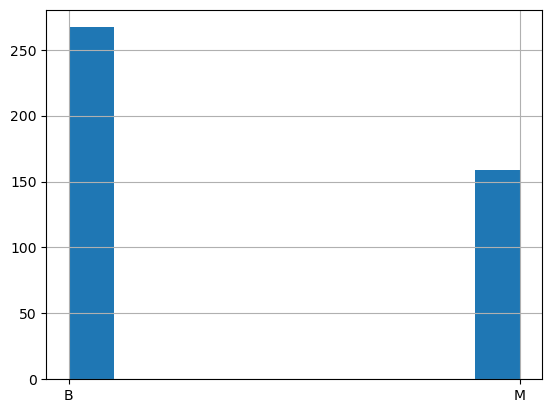

In [10]:
train_set.diagnosis.hist()

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [11]:
#sns.pairplot(train_set)
# No merece la pena hacerlo. Lleva mucho tiempo y hay tantos gráficos que no se entiende nada.

In [12]:
features_num = train_set.select_dtypes(include=(['int','float'])).columns.tolist()
features_num

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis_bin']

Para radius_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean      14.17
std        3.58
min        6.98
25%       11.71
50%       13.36
75%       15.98
max       28.11
Name: radius_mean, dtype: float64

La moda es 11.06, el coeficiente de variación es 25.28% y el IQR es 4.27

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.99, valores extendidos a la derecha

Curtosis: 1.04. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=7.77

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para texture_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean      19.40
std        4.28
min        9.71
25%       16.34
50%       18.94
75%       21.82
max       39.28
Name: texture_mean, dtype: float64

La moda es 16.84, el coeficiente de variación es 22.09% y el IQR es 5.48

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.64, valores extendidos a la derecha

Curtosis: 0.92. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1.64

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.23%

Para perimeter_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


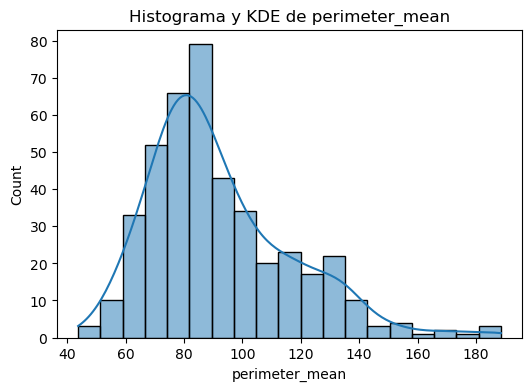

count    426.00
mean      92.19
std       24.67
min       43.79
25%       75.22
50%       86.21
75%      104.60
max      188.50
Name: perimeter_mean, dtype: float64

La moda es 82.61, el coeficiente de variación es 26.76% y el IQR es 29.38

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.04, valores extendidos a la derecha

Curtosis: 1.19. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=8.26

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para area_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


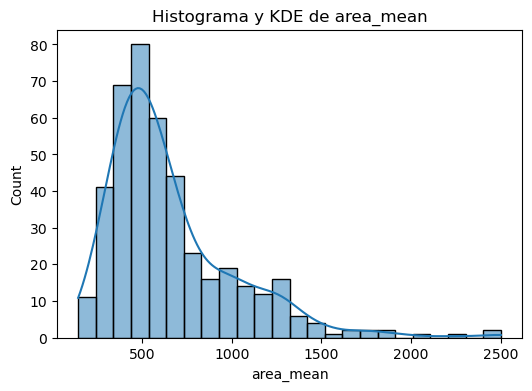

count     426.00
mean      660.08
std       361.43
min       143.50
25%       420.35
50%       548.75
75%       796.65
max      2501.00
Name: area_mean, dtype: float64

La moda es 512.20, el coeficiente de variación es 54.76% y el IQR es 376.30

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.74, valores extendidos a la derecha

Curtosis: 4.11. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=17.47

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.94%

La variable area_mean puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=4.11, asimetria=1.74

Para smoothness_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


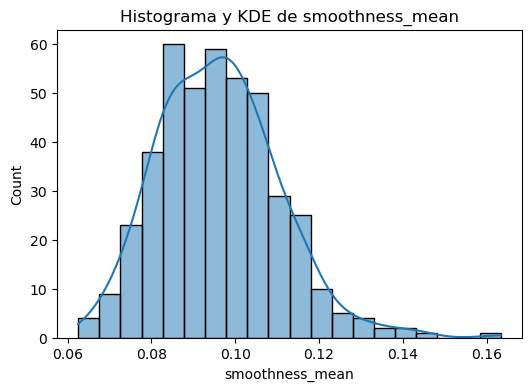

count    426.00
mean       0.10
std        0.01
min        0.06
25%        0.09
50%        0.10
75%        0.10
max        0.16
Name: smoothness_mean, dtype: float64

La moda es 0.11, el coeficiente de variación es 14.97% y el IQR es 0.02

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.59, valores extendidos a la derecha

Curtosis: 1.07. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=0.98

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para compactness_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


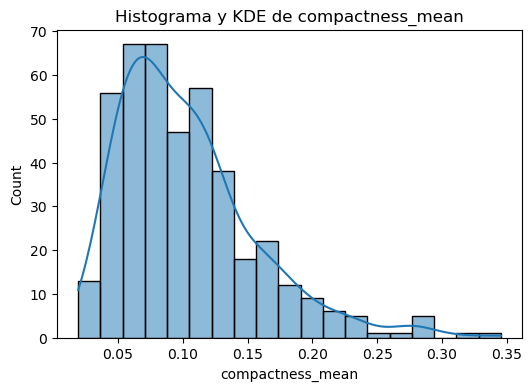

count    426.00
mean       0.10
std        0.05
min        0.02
25%        0.06
50%        0.09
75%        0.13
max        0.35
Name: compactness_mean, dtype: float64

La moda es 0.11, el coeficiente de variación es 51.37% y el IQR es 0.07

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.29, valores extendidos a la derecha

Curtosis: 2.12. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=9.08

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.23%

Para concavity_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


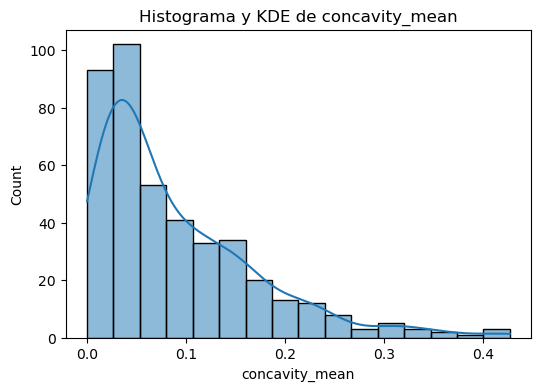

count    426.00
mean       0.09
std        0.08
min        0.00
25%        0.03
50%        0.06
75%        0.13
max        0.43
Name: concavity_mean, dtype: float64

La moda es 0.00, el coeficiente de variación es 91.31% y el IQR es 0.10

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.49, valores extendidos a la derecha

Curtosis: 2.31. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=17.26

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para concave points_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.05
std        0.04
min        0.00
25%        0.02
50%        0.03
75%        0.07
max        0.20
Name: concave points_mean, dtype: float64

La moda es 0.00, el coeficiente de variación es 80.38% y el IQR es 0.05

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.22, valores extendidos a la derecha

Curtosis: 1.23. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=14.87

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para symmetry_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.18
std        0.03
min        0.11
25%        0.16
50%        0.18
75%        0.19
max        0.30
Name: symmetry_mean, dtype: float64

La moda es 0.17, el coeficiente de variación es 15.15% y el IQR es 0.03

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.79, valores extendidos a la derecha

Curtosis: 1.58. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2.88

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.23%

Para fractal_dimension_mean
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.06
std        0.01
min        0.05
25%        0.06
50%        0.06
75%        0.07
max        0.10
Name: fractal_dimension_mean, dtype: float64

La moda es 0.06, el coeficiente de variación es 11.27% y el IQR es 0.01

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.28, valores extendidos a la derecha

Curtosis: 2.72. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=7.25

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.7%

Para radius_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


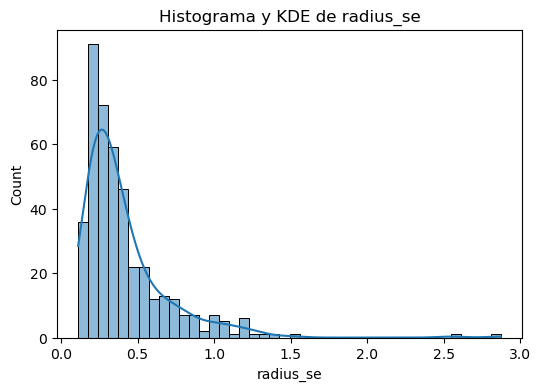

count    426.00
mean       0.41
std        0.29
min        0.11
25%        0.23
50%        0.32
75%        0.48
max        2.87
Name: radius_se, dtype: float64

La moda es 0.16, el coeficiente de variación es 71.66% y el IQR es 0.25

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.19, valores extendidos a la derecha

Curtosis: 17.70. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=27.13

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 6 y suponen en proporción 1.41%

La variable radius_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=17.70, asimetria=3.19

Para texture_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


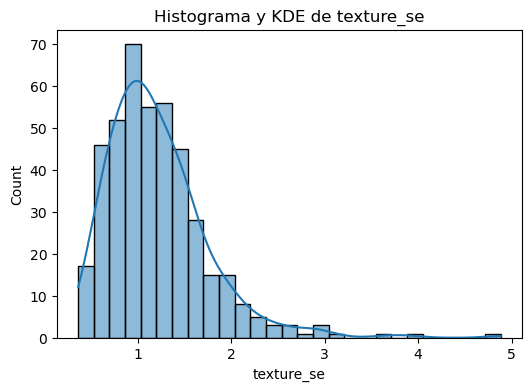

count    426.00
mean       1.21
std        0.55
min        0.36
25%        0.83
50%        1.11
75%        1.47
max        4.88
Name: texture_se, dtype: float64

La moda es 1.35, el coeficiente de variación es 45.23% y el IQR es 0.64

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.84, valores extendidos a la derecha

Curtosis: 6.81. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=8.02

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.7%

La variable texture_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.81, asimetria=1.84

Para perimeter_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


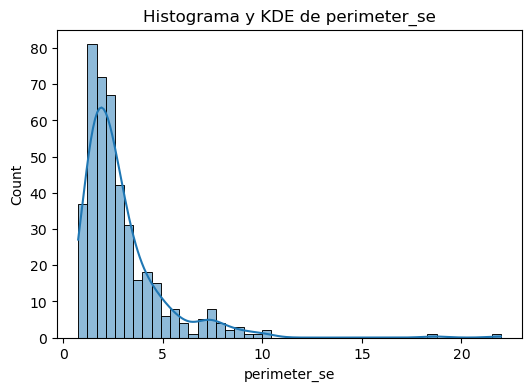

count    426.00
mean       2.90
std        2.13
min        0.76
25%        1.60
50%        2.30
75%        3.37
max       21.98
Name: perimeter_se, dtype: float64

La moda es 1.78, el coeficiente de variación es 73.53% y el IQR es 1.76

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.56, valores extendidos a la derecha

Curtosis: 21.84. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=29.22

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 8 y suponen en proporción 1.88%

La variable perimeter_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=21.84, asimetria=3.56

Para area_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean      41.42
std       49.34
min        6.80
25%       17.85
50%       24.76
75%       45.40
max      542.20
Name: area_se, dtype: float64

La moda es 16.64, el coeficiente de variación es 119.11% y el IQR es 27.54

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 5.49, valores extendidos a la derecha

Curtosis: 46.21. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=47.91

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 19 y suponen en proporción 4.46%

La variable area_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=46.21, asimetria=5.49

Para smoothness_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.01
std        0.00
min        0.00
25%        0.01
50%        0.01
75%        0.01
max        0.03
Name: smoothness_se, dtype: float64

La moda es 0.01, el coeficiente de variación es 41.45% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.54, valores extendidos a la derecha

Curtosis: 14.06. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=12.15

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2 y suponen en proporción 0.47%

La variable smoothness_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=14.06, asimetria=2.54

Para compactness_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


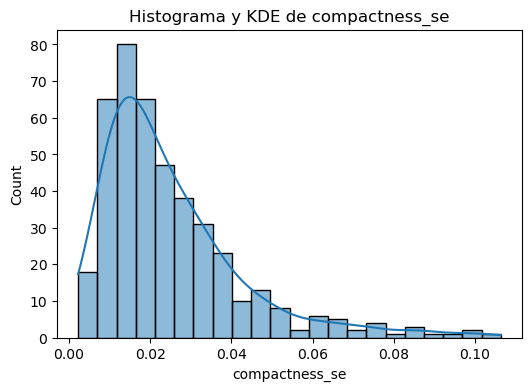

count    426.00
mean       0.03
std        0.02
min        0.00
25%        0.01
50%        0.02
75%        0.03
max        0.11
Name: compactness_se, dtype: float64

La moda es 0.01, el coeficiente de variación es 70.10% y el IQR es 0.02

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.80, valores extendidos a la derecha

Curtosis: 3.88. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=18.07

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 6 y suponen en proporción 1.41%

La variable compactness_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.88, asimetria=1.8

Para concavity_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


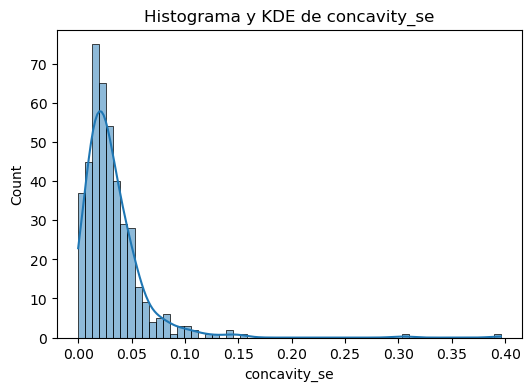

count    426.00
mean       0.03
std        0.03
min        0.00
25%        0.02
50%        0.03
75%        0.04
max        0.40
Name: concavity_se, dtype: float64

La moda es 0.00, el coeficiente de variación es 100.82% y el IQR es 0.03

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 5.44, valores extendidos a la derecha

Curtosis: 49.32. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=27.13

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 7 y suponen en proporción 1.64%

La variable concavity_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=49.32, asimetria=5.44

Para concave points_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


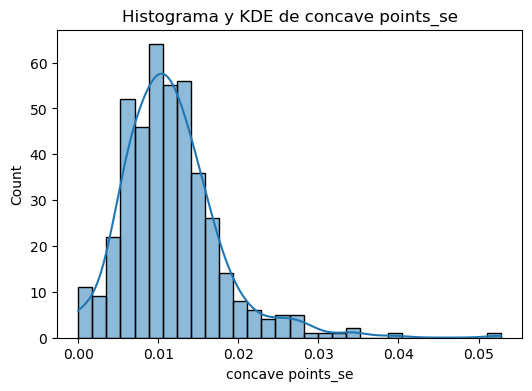

count    426.00
mean       0.01
std        0.01
min        0.00
25%        0.01
50%        0.01
75%        0.01
max        0.05
Name: concave points_se, dtype: float64

La moda es 0.00, el coeficiente de variación es 53.26% y el IQR es 0.01

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.57, valores extendidos a la derecha

Curtosis: 6.01. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=6.66

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.7%

La variable concave points_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.01, asimetria=1.57

Para symmetry_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


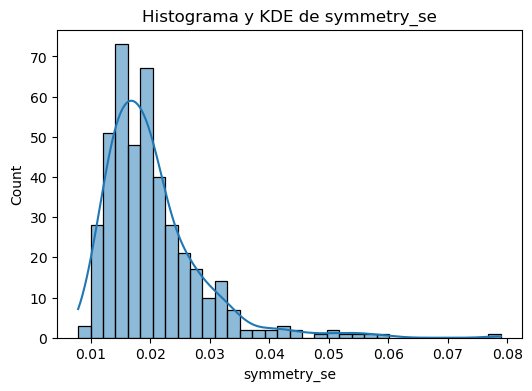

count    426.00
mean       0.02
std        0.01
min        0.01
25%        0.01
50%        0.02
75%        0.02
max        0.08
Name: symmetry_se, dtype: float64

La moda es 0.01, el coeficiente de variación es 41.05% y el IQR es 0.01

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.31, valores extendidos a la derecha

Curtosis: 8.79. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=16.31

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 8 y suponen en proporción 1.88%

La variable symmetry_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=8.79, asimetria=2.31

Para fractal_dimension_se
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


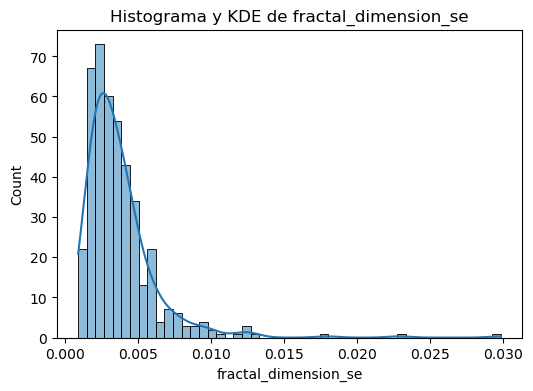

count    426.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.03
Name: fractal_dimension_se, dtype: float64

La moda es 0.00, el coeficiente de variación es 70.38% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 4.23, valores extendidos a la derecha

Curtosis: 30.30. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=25.55

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 8 y suponen en proporción 1.88%

La variable fractal_dimension_se puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=30.30, asimetria=4.23

Para radius_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean      16.37
std        4.93
min        7.93
25%       13.01
50%       14.98
75%       19.19
max       36.04
Name: radius_worst, dtype: float64

La moda es 12.36, el coeficiente de variación es 30.12% y el IQR es 6.18

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.12, valores extendidos a la derecha

Curtosis: 1.02. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=12.13

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para texture_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


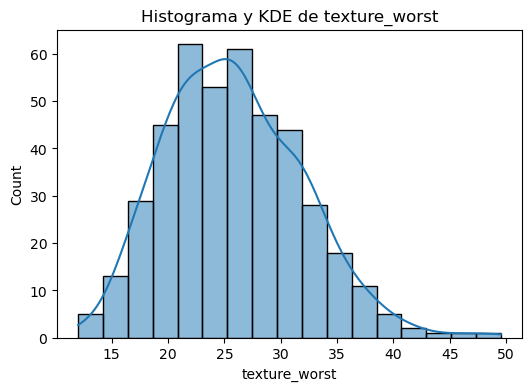

count    426.00
mean      25.84
std        6.05
min       12.02
25%       21.48
50%       25.47
75%       30.14
max       49.54
Name: texture_worst, dtype: float64

La moda es 16.93, el coeficiente de variación es 23.42% y el IQR es 8.66

Prueba Shapiro-Wilk: p-value=0.0001. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.30. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0001

Prueba Anderson-Darling: estadístico=1.33

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para perimeter_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean     107.90
std       34.31
min       50.41
25%       84.10
50%       97.74
75%      126.85
max      251.20
Name: perimeter_worst, dtype: float64

La moda es 78.27, el coeficiente de variación es 31.80% y el IQR es 42.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.15, valores extendidos a la derecha

Curtosis: 1.16. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=11.93

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para area_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count     426.00
mean      892.95
std       587.70
min       185.20
25%       515.82
50%       684.55
75%      1123.25
max      4254.00
Name: area_worst, dtype: float64

La moda es 439.60, el coeficiente de variación es 65.82% y el IQR es 607.43

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.92, valores extendidos a la derecha

Curtosis: 4.69. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=24.05

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 5 y suponen en proporción 1.17%

La variable area_worst puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=4.69, asimetria=1.92

Para smoothness_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


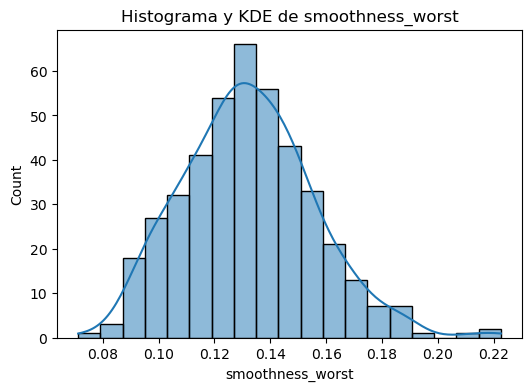

count    426.00
mean       0.13
std        0.02
min        0.07
25%        0.12
50%        0.13
75%        0.15
max        0.22
Name: smoothness_worst, dtype: float64

La moda es 0.12, el coeficiente de variación es 17.78% y el IQR es 0.03

Prueba Shapiro-Wilk: p-value=0.0016. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.47. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0003

Prueba Anderson-Darling: estadístico=0.60

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para compactness_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.25
std        0.15
min        0.03
25%        0.15
50%        0.22
75%        0.33
max        1.06
Name: compactness_worst, dtype: float64

La moda es 0.34, el coeficiente de variación es 61.14% y el IQR es 0.18

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.47, valores extendidos a la derecha

Curtosis: 3.25. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=9.88

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2 y suponen en proporción 0.47%

La variable compactness_worst puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.25, asimetria=1.47

Para concavity_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


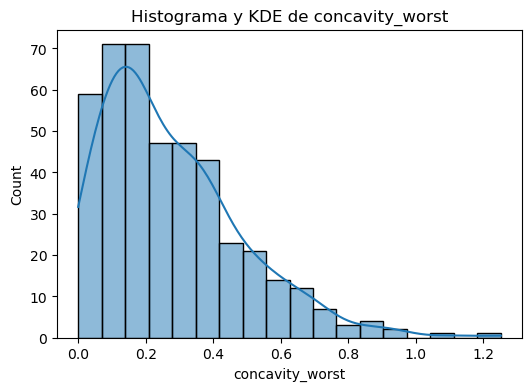

count    426.00
mean       0.27
std        0.21
min        0.00
25%        0.12
50%        0.23
75%        0.39
max        1.25
Name: concavity_worst, dtype: float64

La moda es 0.00, el coeficiente de variación es 76.03% y el IQR es 0.27

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.13, valores extendidos a la derecha

Curtosis: 1.57. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=7.92

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.23%

Para concave points_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.12
std        0.07
min        0.00
25%        0.07
50%        0.10
75%        0.16
max        0.29
Name: concave points_worst, dtype: float64

La moda es 0.00, el coeficiente de variación es 57.31% y el IQR es 0.10

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.54. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=4.81

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para symmetry_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


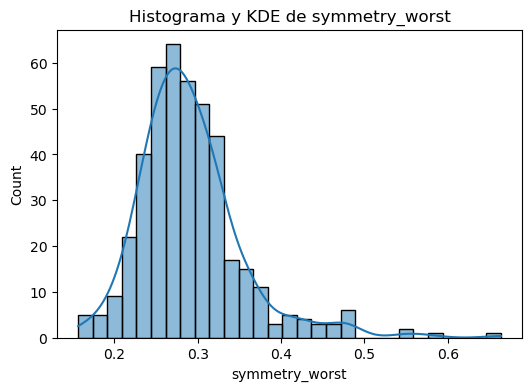

count    426.00
mean       0.29
std        0.06
min        0.16
25%        0.25
50%        0.28
75%        0.32
max        0.66
Name: symmetry_worst, dtype: float64

La moda es 0.22, el coeficiente de variación es 21.77% y el IQR es 0.07

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.57, valores extendidos a la derecha

Curtosis: 5.00. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=8.74

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.94%

La variable symmetry_worst puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=5.00, asimetria=1.57

Para fractal_dimension_worst
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    426.00
mean       0.08
std        0.02
min        0.06
25%        0.07
50%        0.08
75%        0.09
max        0.21
Name: fractal_dimension_worst, dtype: float64

La moda es 0.07, el coeficiente de variación es 21.31% y el IQR es 0.02

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.80, valores extendidos a la derecha

Curtosis: 6.70. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=9.22

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2 y suponen en proporción 0.47%

La variable fractal_dimension_worst puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.70, asimetria=1.8

Para diagnosis_bin
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


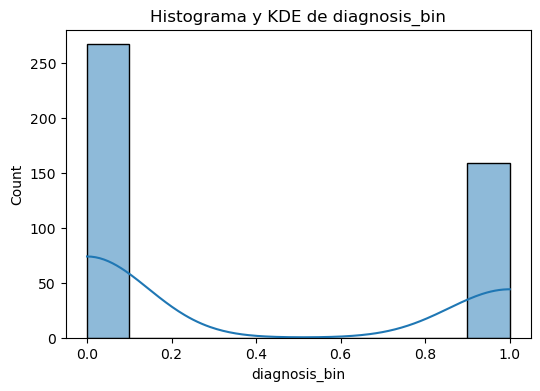

count    426.00
mean       0.37
std        0.48
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: diagnosis_bin, dtype: float64

La moda es 0.00, el coeficiente de variación es 129.74% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.52, valores extendidos a la derecha

Curtosis: -1.73. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=82.96

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

features_log: ['area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']

features_no_log: ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'con

Shapiro  Jarque_Bera  Anderson  Asimetría  Curtosis  \
radius_mean               0.0000       0.0000      7.77       0.99      1.04   
texture_mean              0.0000       0.0000      1.64       0.64      0.92   
perimeter_mean            0.0000       0.0000      8.26       1.04      1.19   
area_mean                 0.0000       0.0000     17.47       1.74      4.11   
smoothness_mean           0.0000       0.0000      0.98       0.59      1.07   
compactness_mean          0.0000       0.0000      9.08       1.29      2.12   
concavity_mean            0.0000       0.0000     17.26       1.49      2.31   
concave points_mean       0.0000       0.0000     14.87       1.22      1.23   
symmetry_mean             0.0000       0.0000      2.88       0.79      1.58   
fractal_dimension_mean    0.0000       0.0000      7.25       1.28      2.72   
radius_se                 0.0000       0.0000     27.13       3.19     17.70   
texture_se                0.0000       0.0000      8.02       1.84      6.81   
perimeter_se              0.0000       0.0000     29.22       3.56     21.84   
area_se                   0.0000       0.0000     47.91       5.49     46.21   
smoothness_se             0.0000       0.0000     12.15       2.54     14.06   
compactness_se            0.0000       0.0000     18.07       1.80      3.88   
concavity_se              0.0000       0.0000     27.13       5.44     49.32   
concave points_se         0.0000       0.0000      6.66       1.57      6.01   
symmetry_se               0.0000       0.0000     16.31       2.31      8.79   
fractal_dimension_se      0.0000       0.0000     25.55       4.23     30.30   
radius_worst              0.0000       0.0000     12.13       1.12      1.02   
texture_worst             0.0001       0.0001      1.33       0.49      0.30   
perimeter_worst           0.0000       0.0000     11.93       1.15      1.16   
area_worst                0.0000       0.0000     24.05       1.92      4.69   
smoothness_worst          0.0016       0.0003      0.60       0.41      0.47   
compactness_worst         0.0000       0.0000      9.88       1.47      3.25   
concavity_worst           0.0000       0.0000      7.92       1.13      1.57   
concave points_worst      0.0000       0.0000      4.81       0.48     -0.54   
symmetry_worst            0.0000       0.0000      8.74       1.57      5.00   
fractal_dimension_worst   0.0000       0.0000      9.22       1.80      6.70   
diagnosis_bin             0.0000       0.0000     82.96       0.52     -1.73   

                         Outliers_inf_pro  Outliers_sup_pro  Log_transform  
radius_mean                           0.0              0.00          False  
texture_mean                          0.0              0.23          False  
perimeter_mean                        0.0              0.00          False  
area_mean                             0.0              0.94           True  
smoothness_mean                       0.0              0.00          False  
compactness_mean                      0.0              0.23          False  
concavity_mean                        0.0              0.00          False  
concave points_mean                   0.0              0.00          False  
symmetry_mean                         0.0              0.23          False  
fractal_dimension_mean                0.0              0.70          False  
radius_se                             0.0              1.41           True  
texture_se                            0.0              0.70           True  
perimeter_se                          0.0              1.88           True  
area_se                               0.0              4.46           True  
smoothness_se                         0.0              0.47           True  
compactness_se                        0.0              1.41           True  
concavity_se                          0.0              1.64           True  
concave points_se                     0.0              0.70           True  
s

In [13]:
analisis_univariable_numericas(train_set,features_num)

In [14]:
# Features a las que se las debería hacer un proceso de transformación
features_trans = ['area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']
features_no_trans = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

Análisis de radius_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

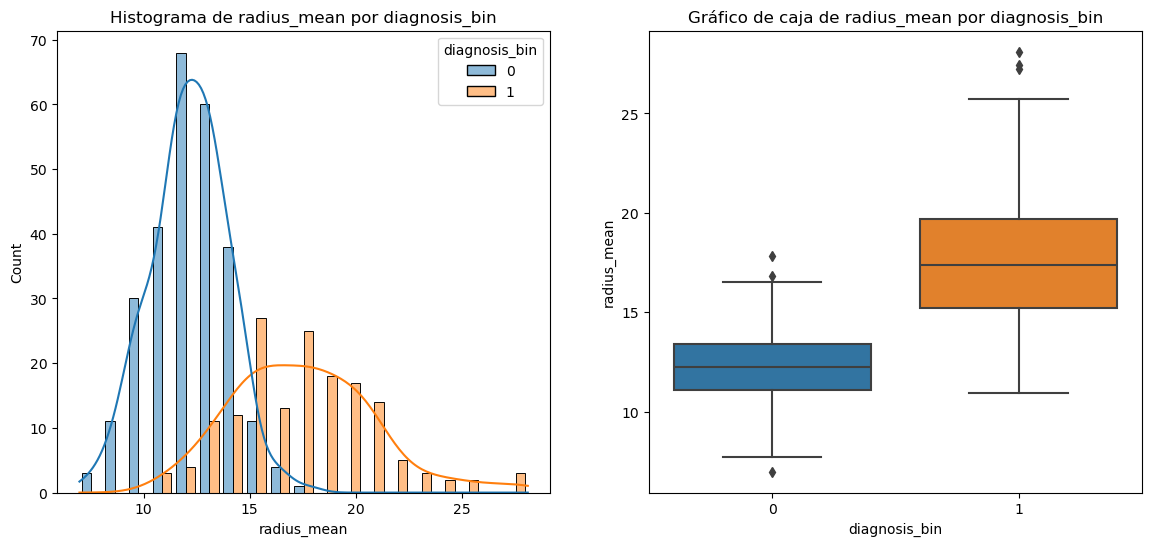

Estadísticos de resumen para radius_mean por diagnosis_bin:
               count   mean  std    min   25%    50%    75%    max
diagnosis_bin                                                     
0              267.0  12.17  1.8   6.98  11.1  12.23  13.38  17.85
1              159.0  17.53  3.3  10.95  15.2  17.35  19.71  28.11

Prueba t-student para radius_mean:
Estadístico t: -21.69
p-valor: 0.000
La variable radius_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de texture_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para texture_mean por diagnosis_bin:
               count   mean   std    min    25%    50%    75%    max
diagnosis_bin                                                       
0              267.0  18.10  4.03   9.71  15.36  17.48  20.19  33.81
1              159.0  21.58  3.80  10.38  19.15  21.38  23.78  39.28

Prueba t-student para texture_mean:
Estadístico t: -8.81
p-valor: 0.000
La variable texture_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de perimeter_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

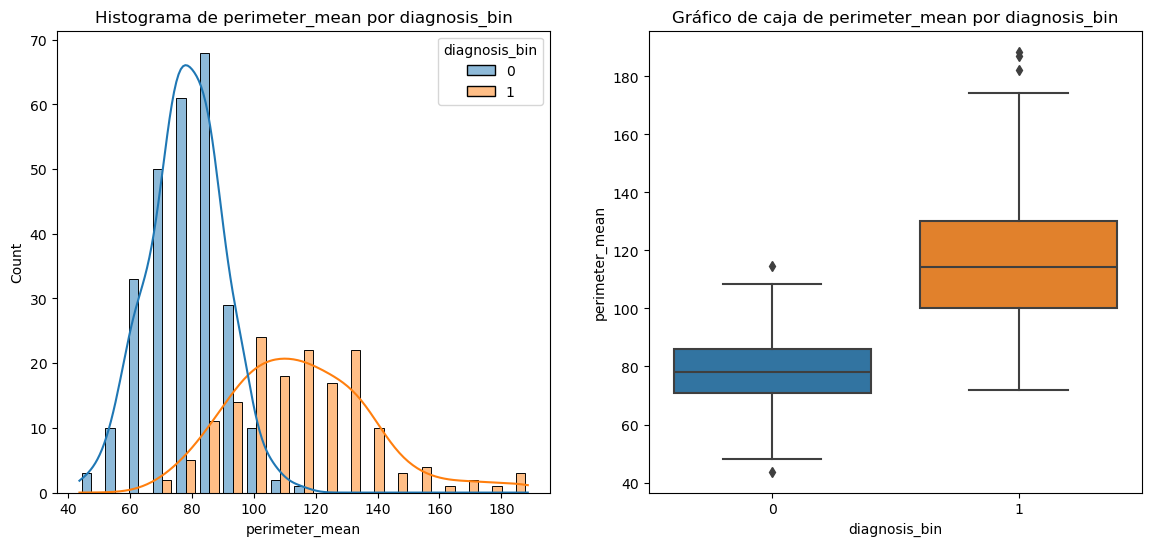

Estadísticos de resumen para perimeter_mean por diagnosis_bin:
               count    mean    std    min     25%     50%     75%    max
diagnosis_bin                                                            
0              267.0   78.18  11.97  43.79   70.83   78.18   86.17  114.6
1              159.0  115.72  22.51  71.90  100.10  114.20  130.20  188.5

Prueba t-student para perimeter_mean:
Estadístico t: -22.45
p-valor: 0.000
La variable perimeter_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de area_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

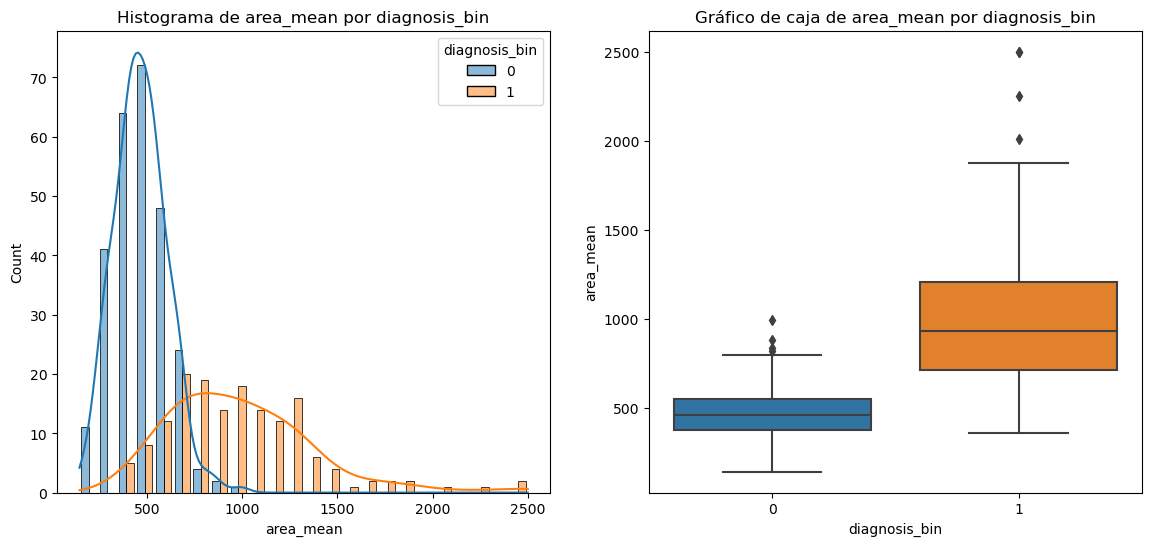

Estadísticos de resumen para area_mean por diagnosis_bin:
               count    mean     std    min     25%    50%     75%     max
diagnosis_bin                                                             
0              267.0  464.86  136.55  143.5  378.30  461.0   551.4   992.1
1              159.0  987.90  383.98  361.6  714.95  933.1  1206.5  2501.0

Prueba t-student para area_mean:
Estadístico t: -20.23
p-valor: 0.000
La variable area_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de smoothness_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

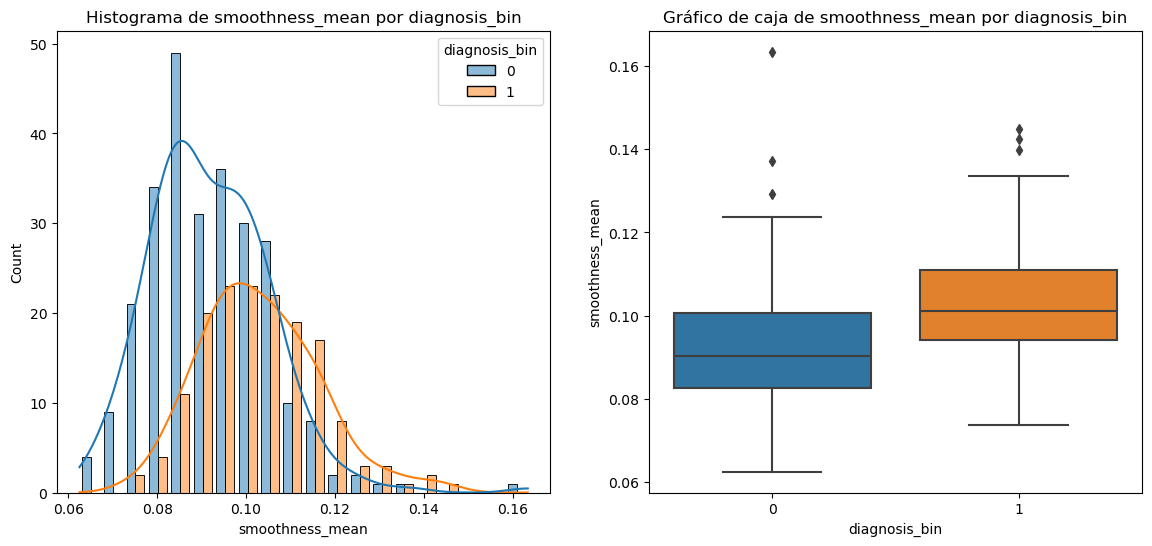

Estadísticos de resumen para smoothness_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.09  0.01  0.06  0.08  0.09  0.10  0.16
1              159.0  0.10  0.01  0.07  0.09  0.10  0.11  0.14

Prueba t-student para smoothness_mean:
Estadístico t: -8.37
p-valor: 0.000
La variable smoothness_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de compactness_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

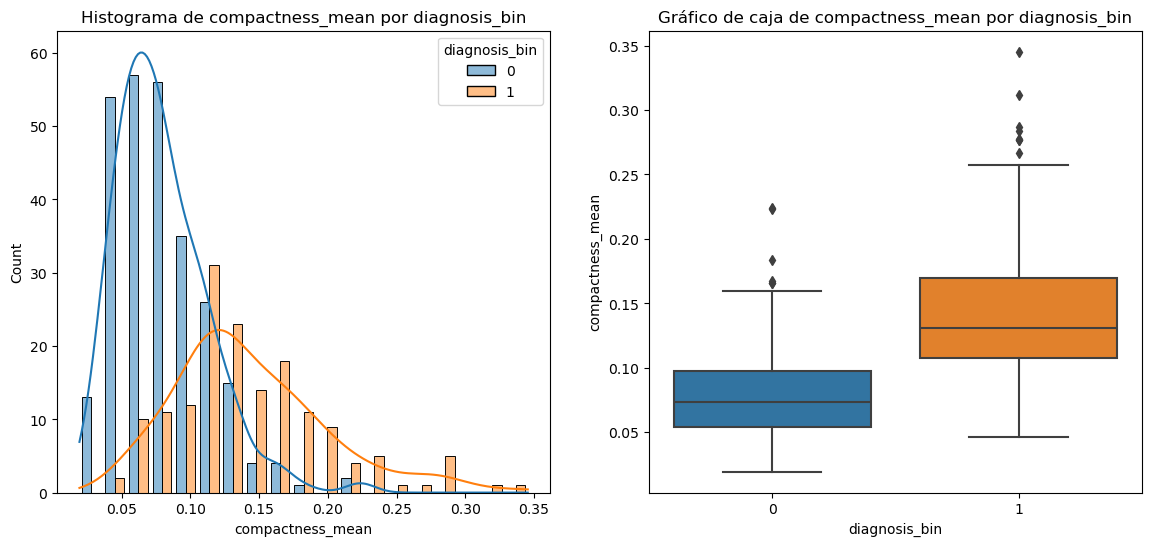

Estadísticos de resumen para compactness_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.08  0.03  0.02  0.05  0.07  0.10  0.22
1              159.0  0.14  0.06  0.05  0.11  0.13  0.17  0.35

Prueba t-student para compactness_mean:
Estadístico t: -15.01
p-valor: 0.000
La variable compactness_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concavity_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

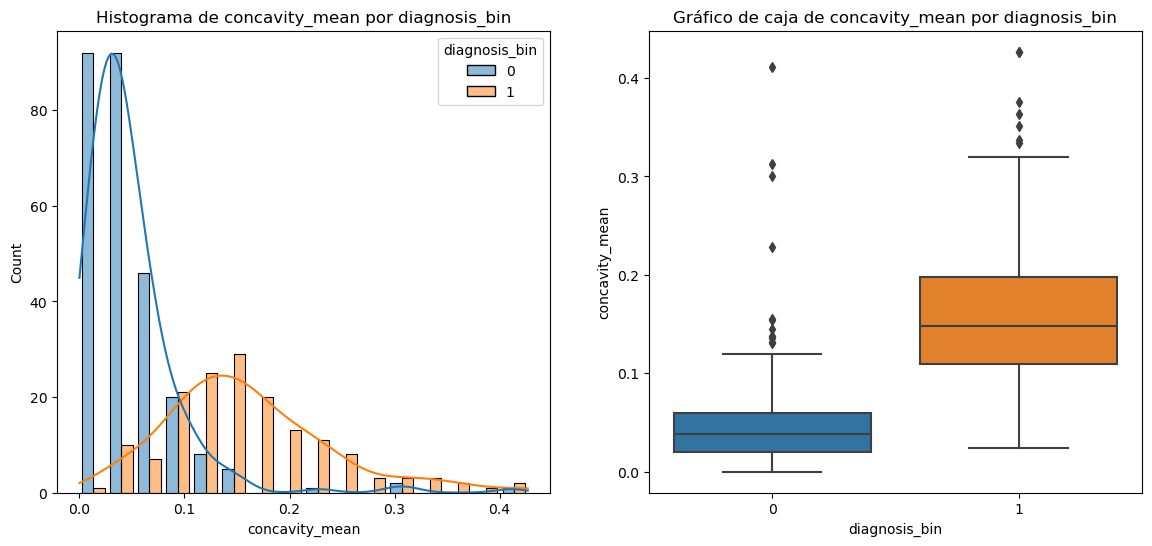

Estadísticos de resumen para concavity_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.05  0.05  0.00  0.02  0.04  0.06  0.41
1              159.0  0.16  0.08  0.02  0.11  0.15  0.20  0.43

Prueba t-student para concavity_mean:
Estadístico t: -18.66
p-valor: 0.000
La variable concavity_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concave points_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para concave points_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.03  0.02  0.00  0.02  0.02  0.03  0.08
1              159.0  0.09  0.04  0.02  0.06  0.09  0.10  0.20

Prueba t-student para concave points_mean:
Estadístico t: -24.86
p-valor: 0.000
La variable concave points_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de symmetry_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para symmetry_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.17  0.02  0.11  0.16  0.17  0.19  0.26
1              159.0  0.19  0.03  0.13  0.17  0.19  0.21  0.30

Prueba t-student para symmetry_mean:
Estadístico t: -6.73
p-valor: 0.000
La variable symmetry_mean está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de fractal_dimension_mean vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

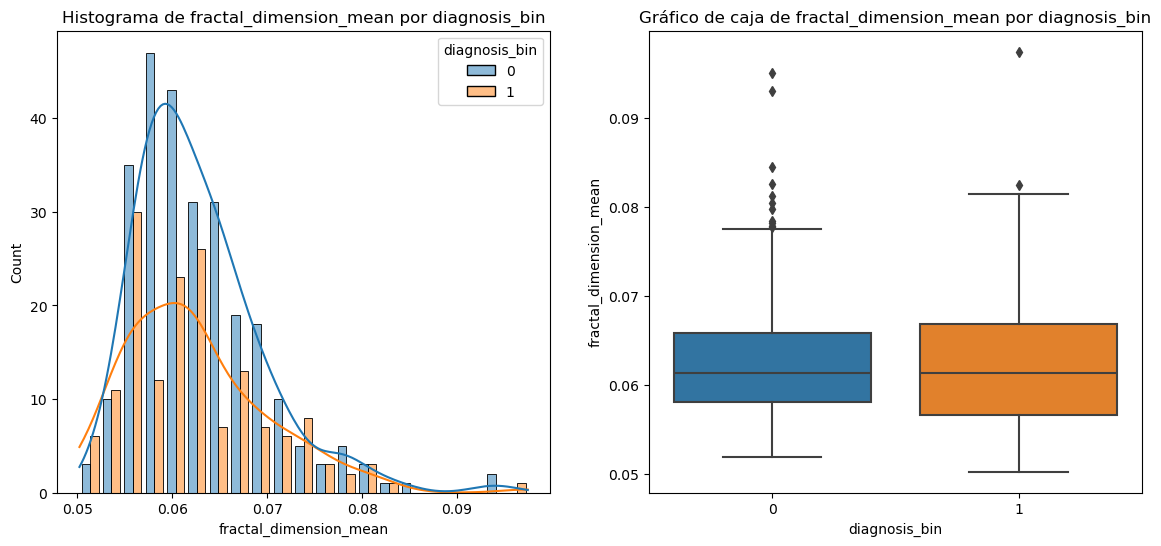

Estadísticos de resumen para fractal_dimension_mean por diagnosis_bin:
               count  mean   std   min   25%   50%   75%  max
diagnosis_bin                                                
0              267.0  0.06  0.01  0.05  0.06  0.06  0.07  0.1
1              159.0  0.06  0.01  0.05  0.06  0.06  0.07  0.1

Prueba t-student para fractal_dimension_mean:
Estadístico t: 0.40
p-valor: 0.686
La variable fractal_dimension_mean no está significativamente asociada con diagnosis_bin (p >= 0.05).

Análisis de radius_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

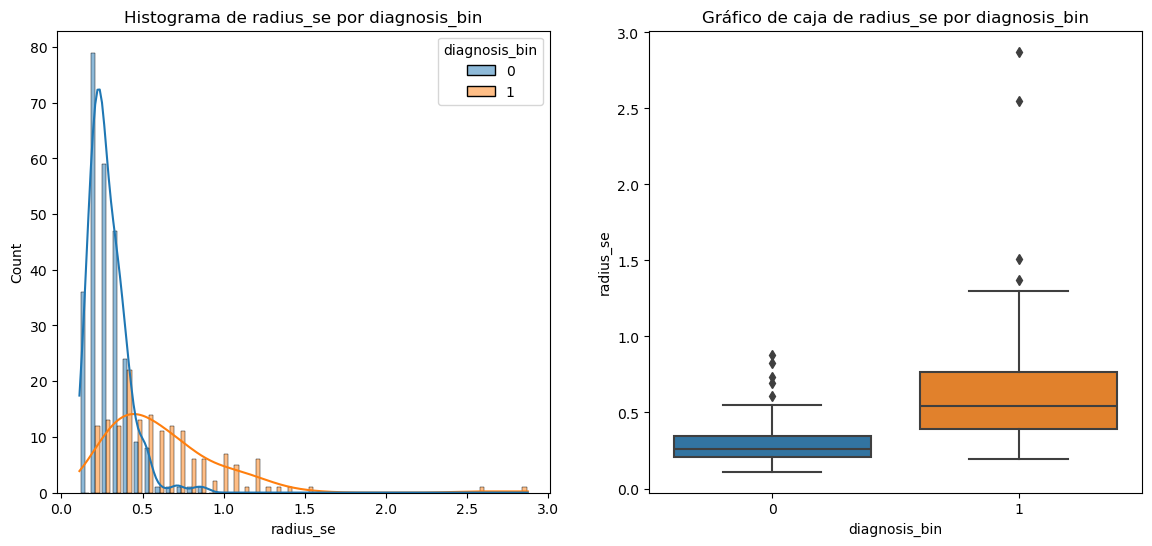

Estadísticos de resumen para radius_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.28  0.12  0.11  0.21  0.26  0.34  0.88
1              159.0  0.62  0.37  0.19  0.39  0.54  0.77  2.87

Prueba t-student para radius_se:
Estadístico t: -13.86
p-valor: 0.000
La variable radius_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de texture_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

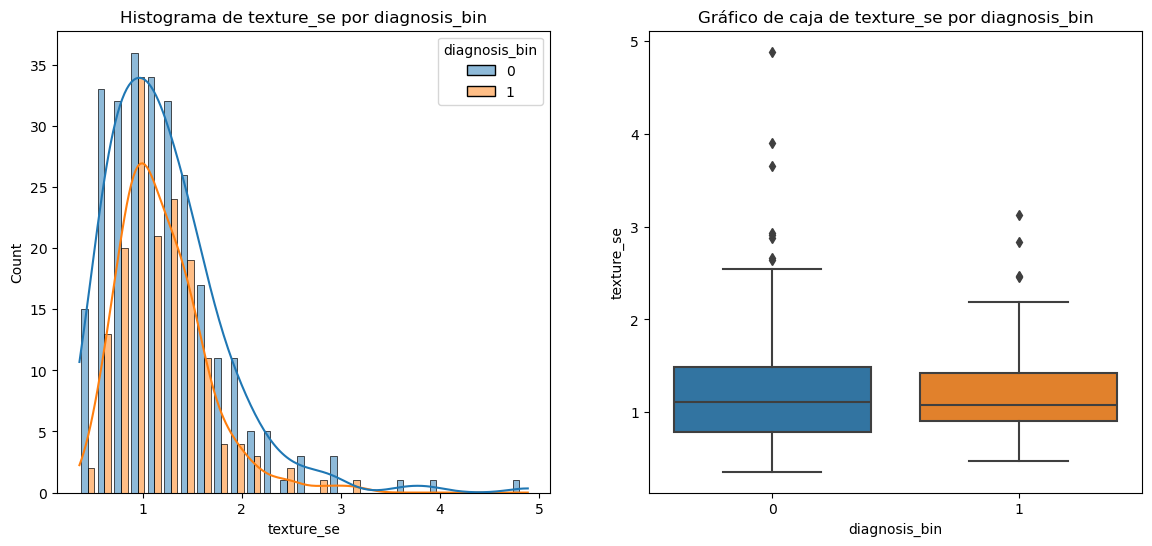

Estadísticos de resumen para texture_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  1.22  0.60  0.36  0.78  1.11  1.49  4.88
1              159.0  1.19  0.44  0.48  0.90  1.08  1.42  3.12

Prueba t-student para texture_se:
Estadístico t: 0.47
p-valor: 0.638
La variable texture_se no está significativamente asociada con diagnosis_bin (p >= 0.05).

Análisis de perimeter_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

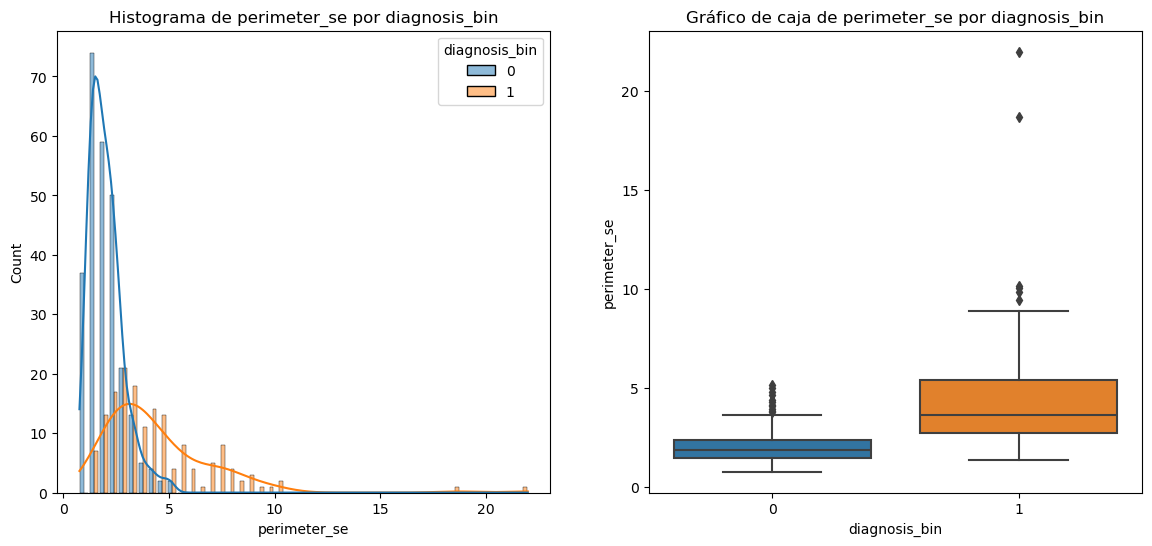

Estadísticos de resumen para perimeter_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%    max
diagnosis_bin                                                  
0              267.0  2.00  0.79  0.76  1.44  1.86  2.37   5.12
1              159.0  4.41  2.75  1.33  2.71  3.59  5.38  21.98

Prueba t-student para perimeter_se:
Estadístico t: -13.42
p-valor: 0.000
La variable perimeter_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de area_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

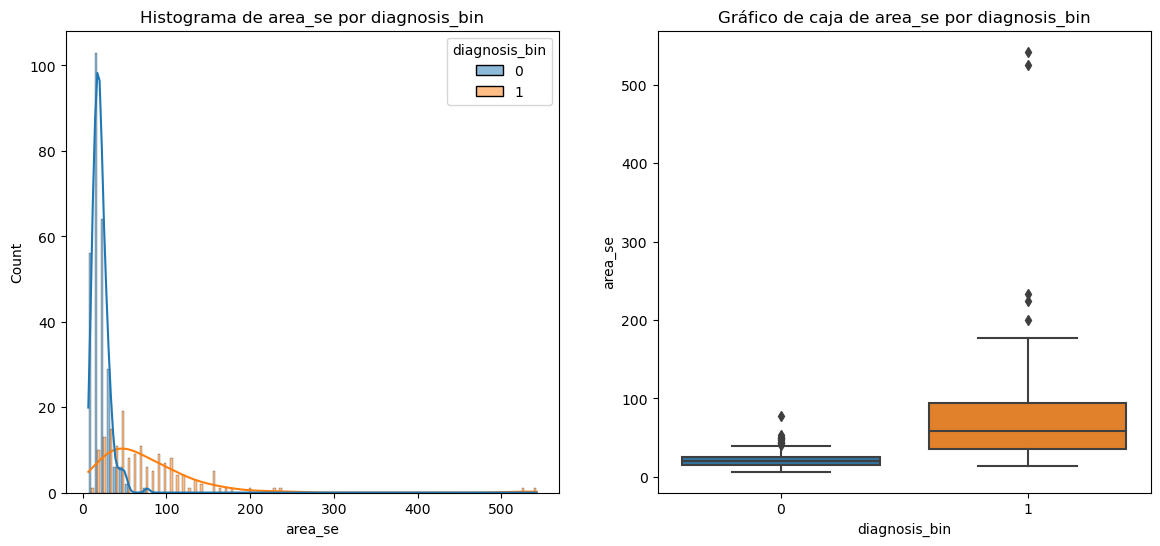

Estadísticos de resumen para area_se por diagnosis_bin:
               count   mean    std    min    25%    50%    75%     max
diagnosis_bin                                                         
0              267.0  21.28   9.19   6.80  15.25  19.88  25.20   77.11
1              159.0  75.24  67.60  13.99  36.17  58.53  94.01  542.20

Prueba t-student para area_se:
Estadístico t: -12.85
p-valor: 0.000
La variable area_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de smoothness_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

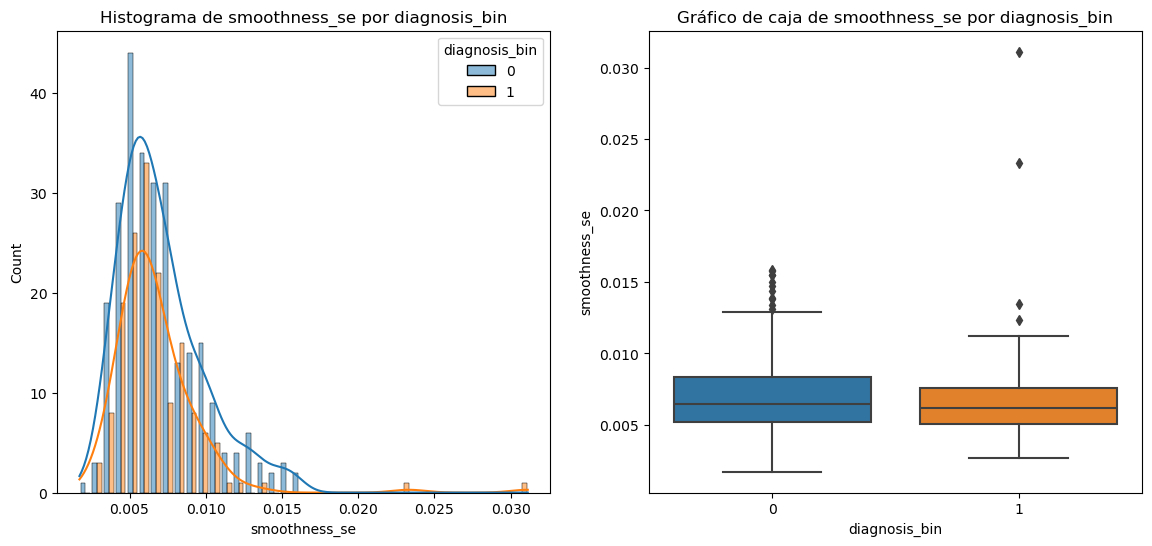

Estadísticos de resumen para smoothness_se por diagnosis_bin:
               count  mean  std  min   25%   50%   75%   max
diagnosis_bin                                               
0              267.0  0.01  0.0  0.0  0.01  0.01  0.01  0.02
1              159.0  0.01  0.0  0.0  0.01  0.01  0.01  0.03

Prueba t-student para smoothness_se:
Estadístico t: 1.07
p-valor: 0.285
La variable smoothness_se no está significativamente asociada con diagnosis_bin (p >= 0.05).

Análisis de compactness_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

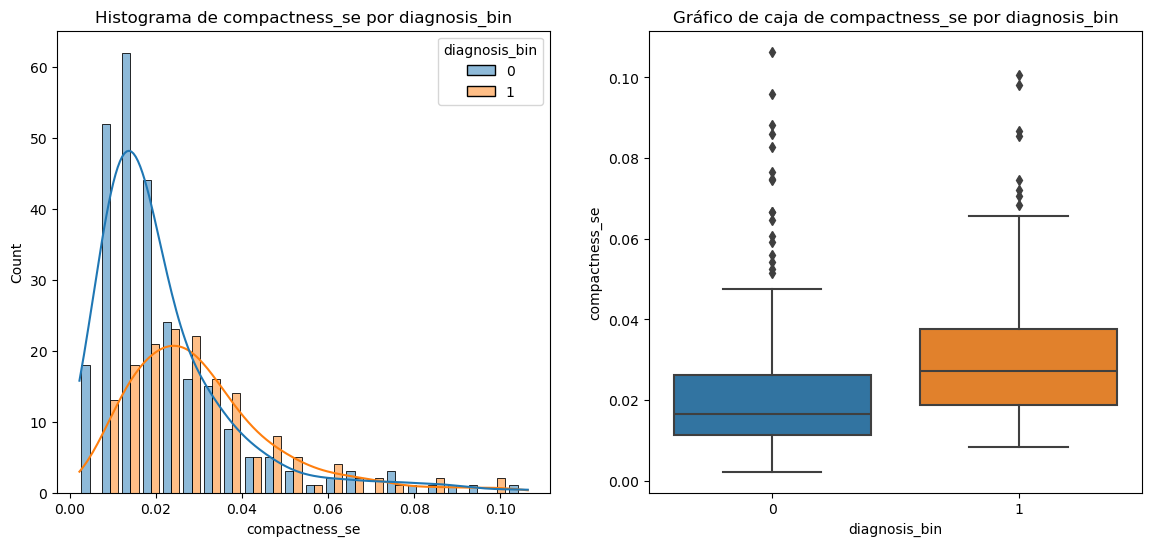

Estadísticos de resumen para compactness_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.02  0.02  0.00  0.01  0.02  0.03  0.11
1              159.0  0.03  0.02  0.01  0.02  0.03  0.04  0.10

Prueba t-student para compactness_se:
Estadístico t: -5.41
p-valor: 0.000
La variable compactness_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concavity_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para concavity_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.03  0.04  0.00  0.01  0.02  0.03  0.40
1              159.0  0.04  0.02  0.01  0.03  0.04  0.05  0.14

Prueba t-student para concavity_se:
Estadístico t: -4.37
p-valor: 0.000
La variable concavity_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concave points_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

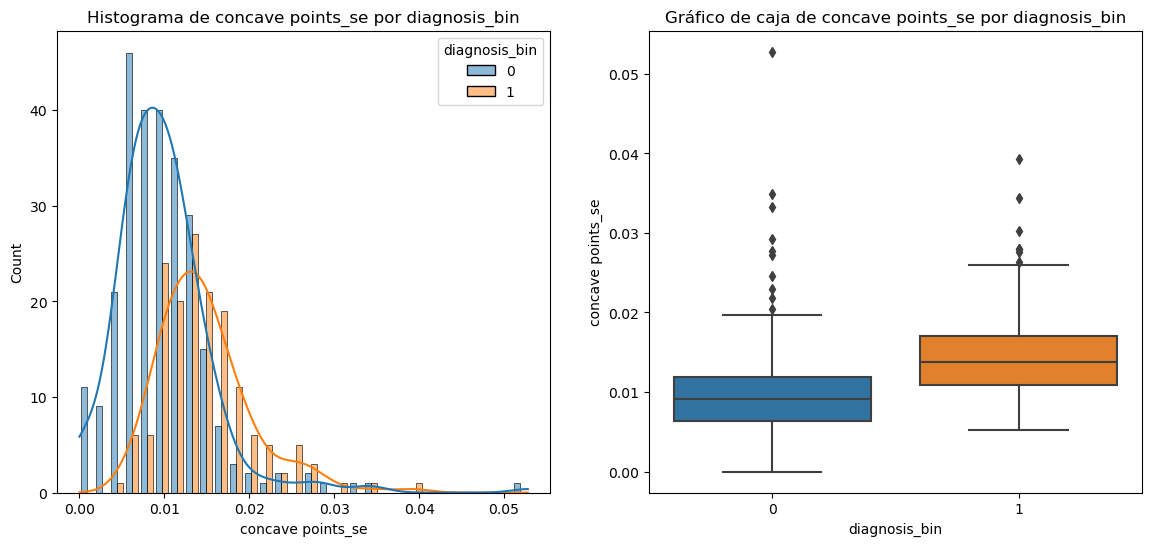

Estadísticos de resumen para concave points_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.01  0.01  0.00  0.01  0.01  0.01  0.05
1              159.0  0.01  0.01  0.01  0.01  0.01  0.02  0.04

Prueba t-student para concave points_se:
Estadístico t: -8.64
p-valor: 0.000
La variable concave points_se está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de symmetry_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para symmetry_se por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.02  0.01  0.01  0.02  0.02  0.02  0.04
1              159.0  0.02  0.01  0.01  0.01  0.02  0.02  0.08

Prueba t-student para symmetry_se:
Estadístico t: 0.09
p-valor: 0.926
La variable symmetry_se no está significativamente asociada con diagnosis_bin (p >= 0.05).

Análisis de fractal_dimension_se vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

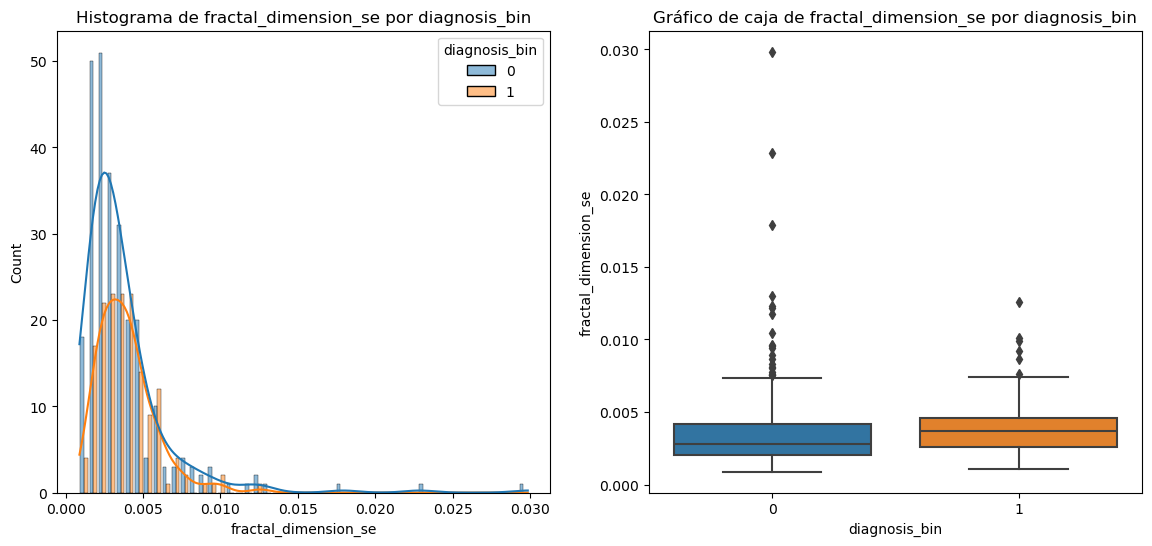

Estadísticos de resumen para fractal_dimension_se por diagnosis_bin:
               count  mean  std  min  25%  50%  75%   max
diagnosis_bin                                            
0              267.0   0.0  0.0  0.0  0.0  0.0  0.0  0.03
1              159.0   0.0  0.0  0.0  0.0  0.0  0.0  0.01

Prueba t-student para fractal_dimension_se:
Estadístico t: -0.79
p-valor: 0.431
La variable fractal_dimension_se no está significativamente asociada con diagnosis_bin (p >= 0.05).

Análisis de radius_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

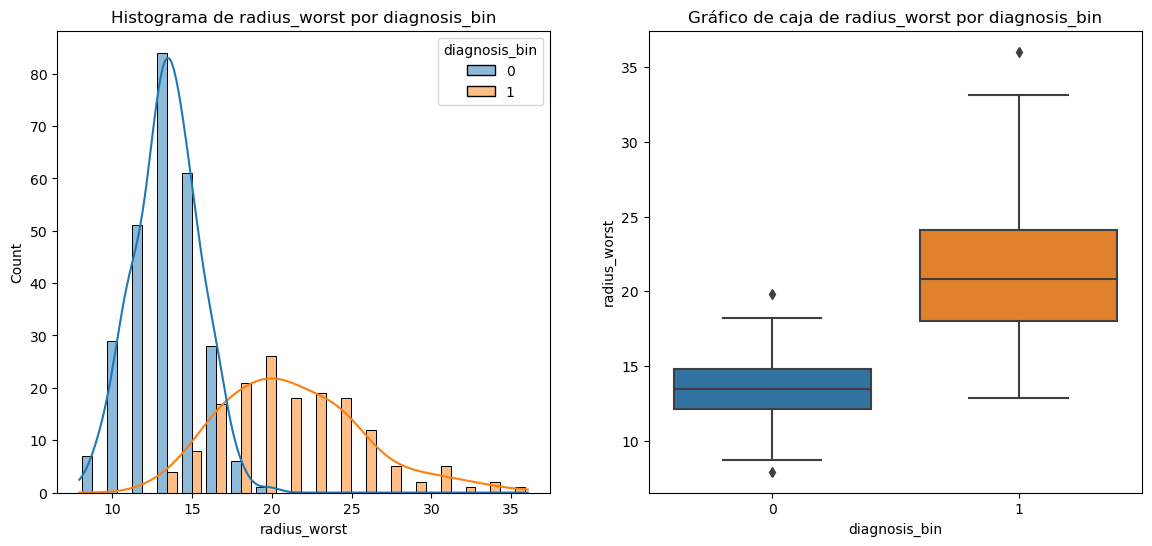

Estadísticos de resumen para radius_worst por diagnosis_bin:
               count   mean   std    min    25%    50%    75%    max
diagnosis_bin                                                       
0              267.0  13.42  2.01   7.93  12.10  13.45  14.82  19.82
1              159.0  21.31  4.40  12.84  18.02  20.80  24.12  36.04

Prueba t-student para radius_worst:
Estadístico t: -25.22
p-valor: 0.000
La variable radius_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de texture_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

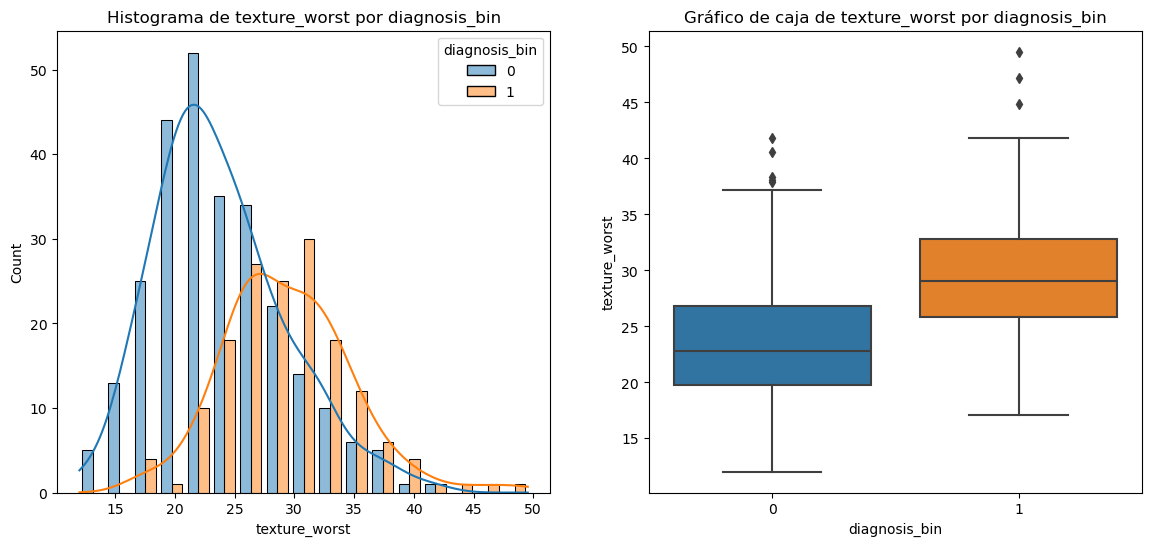

Estadísticos de resumen para texture_worst por diagnosis_bin:
               count   mean   std    min    25%    50%    75%    max
diagnosis_bin                                                       
0              267.0  23.73  5.42  12.02  19.78  22.82  26.80  41.78
1              159.0  29.40  5.37  17.04  25.82  29.02  32.82  49.54

Prueba t-student para texture_worst:
Estadístico t: -10.47
p-valor: 0.000
La variable texture_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de perimeter_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

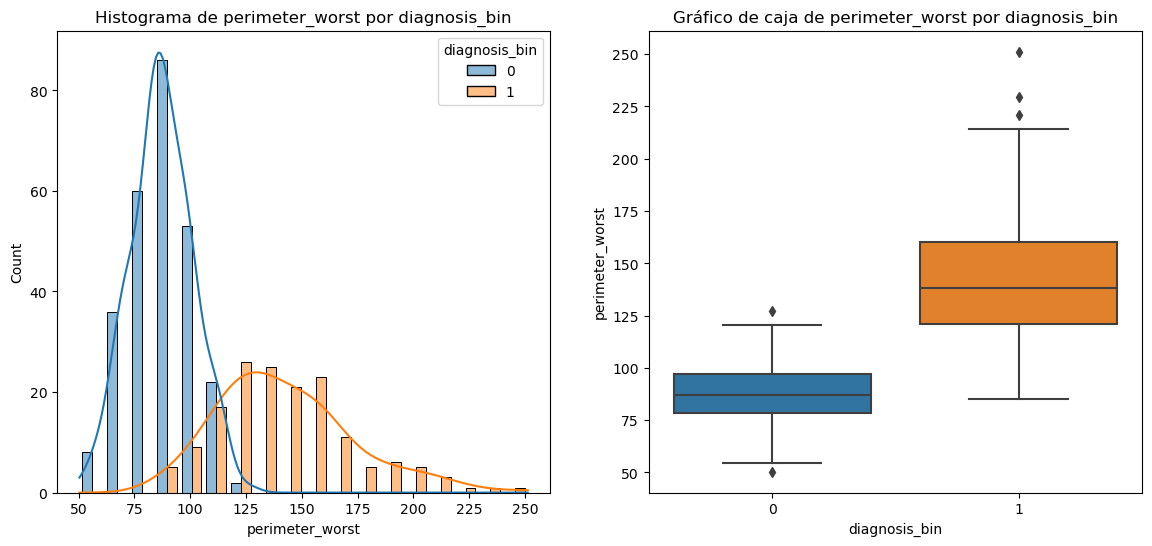

Estadísticos de resumen para perimeter_worst por diagnosis_bin:
               count    mean    std    min     25%    50%     75%    max
diagnosis_bin                                                           
0              267.0   87.29  13.78  50.41   78.36   87.0   96.92  127.1
1              159.0  142.51  30.40  85.10  120.80  138.1  160.10  251.2

Prueba t-student para perimeter_worst:
Estadístico t: -25.60
p-valor: 0.000
La variable perimeter_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de area_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para area_worst por diagnosis_bin:
               count     mean     std    min     25%     50%     75%     max
diagnosis_bin                                                               
0              267.0   563.22  167.10  185.2  451.15   550.6   670.3  1210.0
1              159.0  1446.65  624.34  508.1  991.10  1313.0  1739.5  4254.0

Prueba t-student para area_worst:
Estadístico t: -21.86
p-valor: 0.000
La variable area_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de smoothness_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

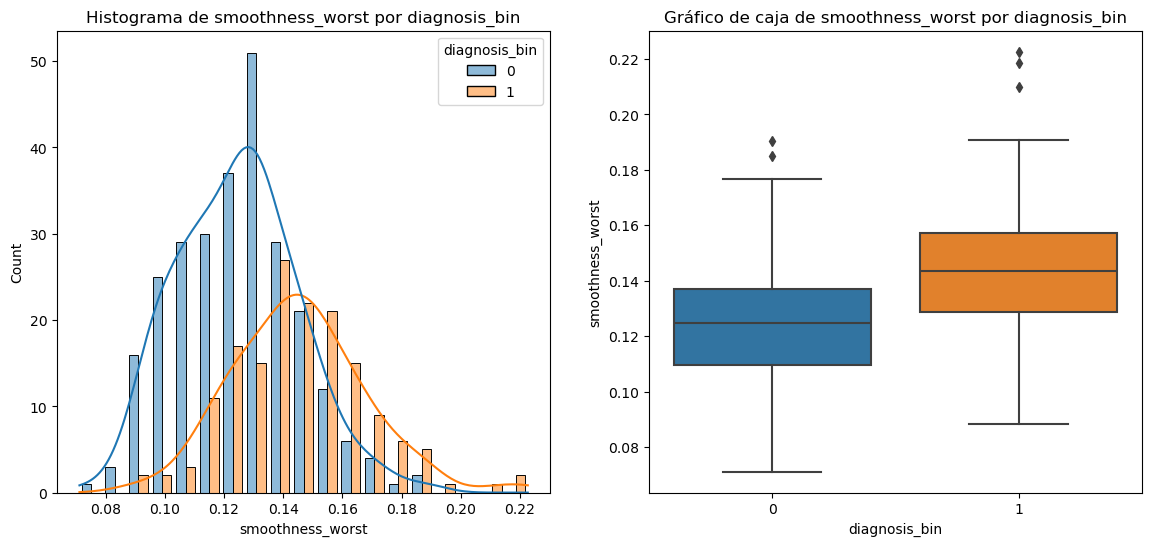

Estadísticos de resumen para smoothness_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.12  0.02  0.07  0.11  0.12  0.14  0.19
1              159.0  0.15  0.02  0.09  0.13  0.14  0.16  0.22

Prueba t-student para smoothness_worst:
Estadístico t: -9.76
p-valor: 0.000
La variable smoothness_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de compactness_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

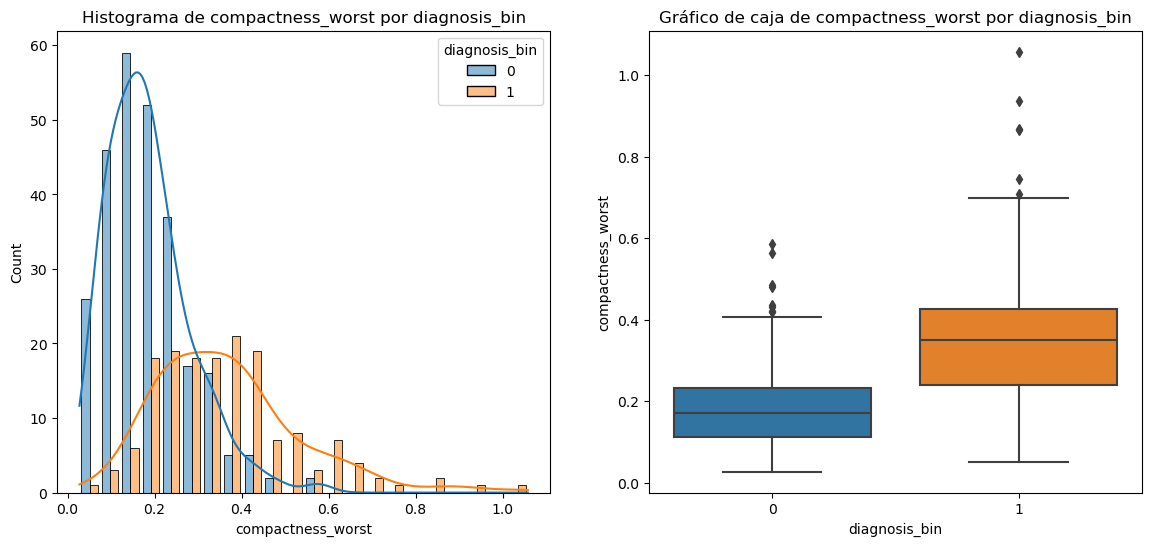

Estadísticos de resumen para compactness_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.18  0.10  0.03  0.11  0.17  0.23  0.58
1              159.0  0.37  0.17  0.05  0.24  0.35  0.43  1.06

Prueba t-student para compactness_worst:
Estadístico t: -14.24
p-valor: 0.000
La variable compactness_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concavity_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Estadísticos de resumen para concavity_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.17  0.15  0.00  0.08  0.14  0.23  1.25
1              159.0  0.44  0.18  0.02  0.32  0.41  0.54  1.10

Prueba t-student para concavity_worst:
Estadístico t: -16.82
p-valor: 0.000
La variable concavity_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de concave points_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

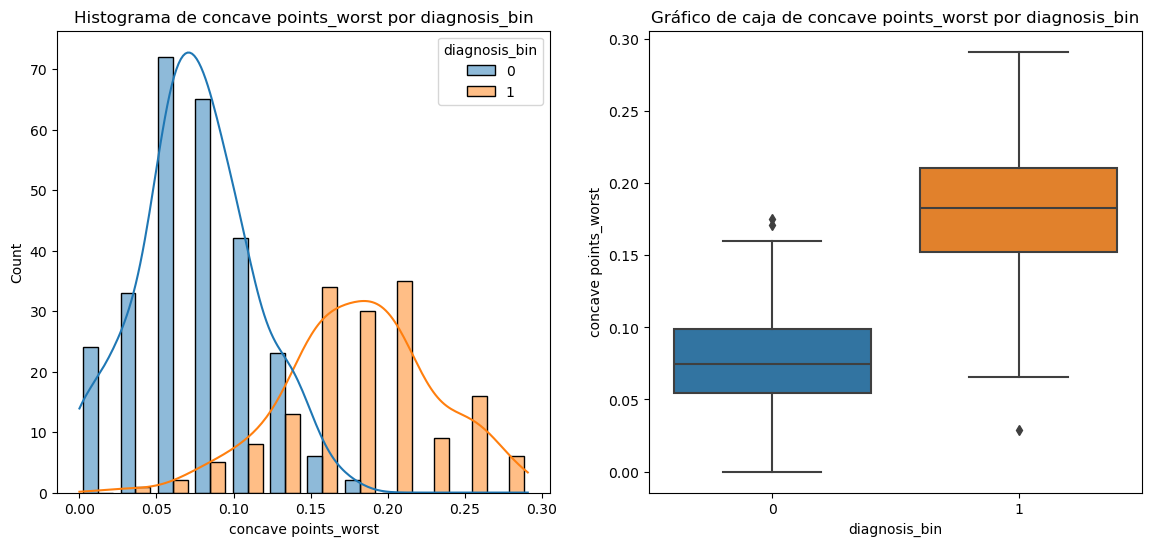

Estadísticos de resumen para concave points_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.08  0.04  0.00  0.05  0.07  0.10  0.18
1              159.0  0.18  0.05  0.03  0.15  0.18  0.21  0.29

Prueba t-student para concave points_worst:
Estadístico t: -25.68
p-valor: 0.000
La variable concave points_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de symmetry_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

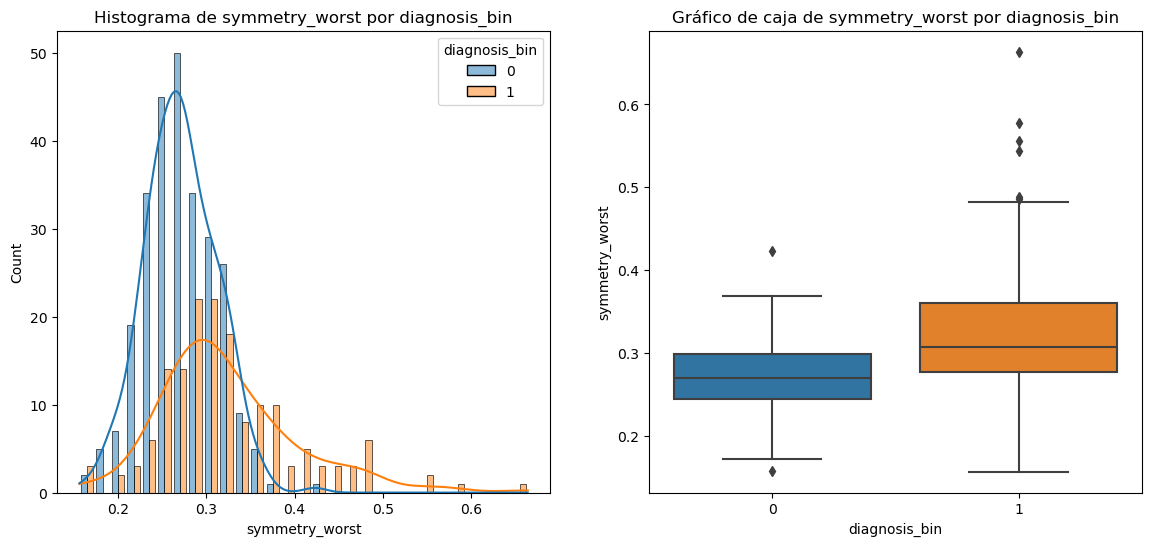

Estadísticos de resumen para symmetry_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.27  0.04  0.16  0.24  0.27  0.30  0.42
1              159.0  0.32  0.08  0.16  0.28  0.31  0.36  0.66

Prueba t-student para symmetry_worst:
Estadístico t: -9.16
p-valor: 0.000
La variable symmetry_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de fractal_dimension_worst vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

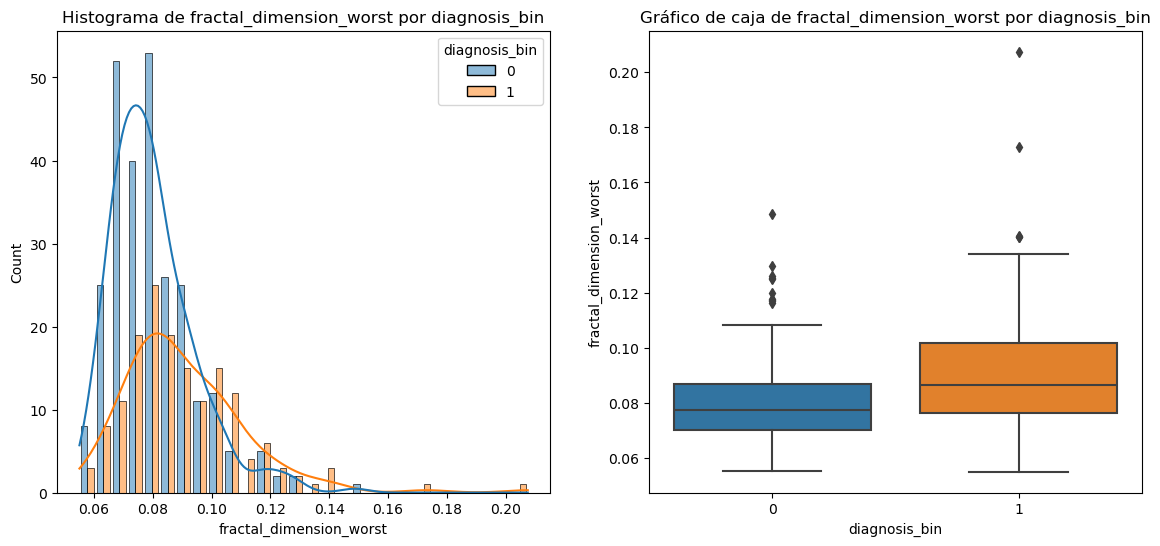

Estadísticos de resumen para fractal_dimension_worst por diagnosis_bin:
               count  mean   std   min   25%   50%   75%   max
diagnosis_bin                                                 
0              267.0  0.08  0.01  0.06  0.07  0.08  0.09  0.15
1              159.0  0.09  0.02  0.06  0.08  0.09  0.10  0.21

Prueba t-student para fractal_dimension_worst:
Estadístico t: -6.29
p-valor: 0.000
La variable fractal_dimension_worst está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Análisis de diagnosis_bin vs diagnosis_bin
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

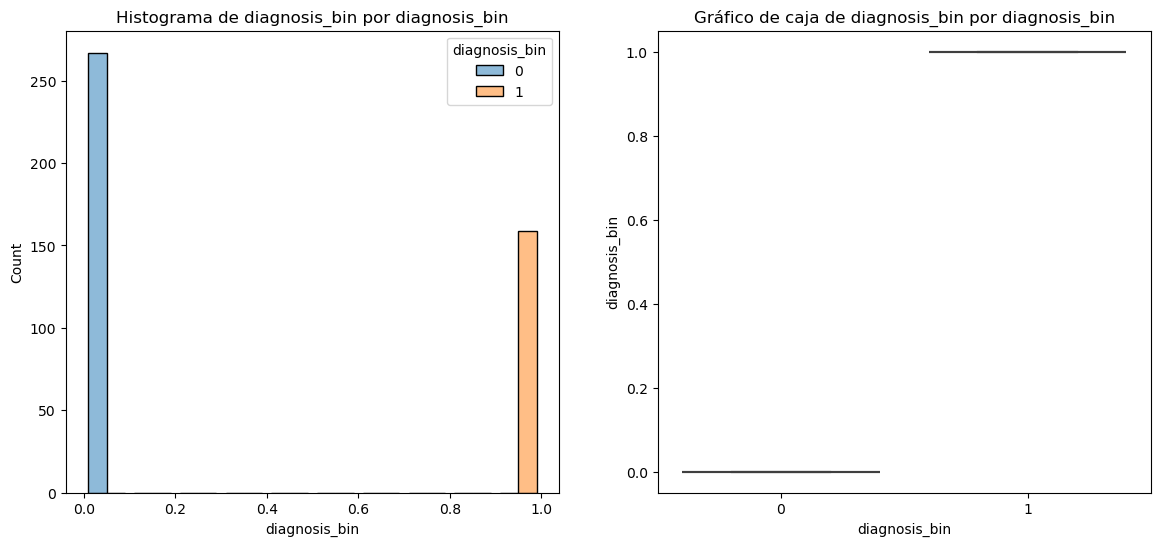

Estadísticos de resumen para diagnosis_bin por diagnosis_bin:
               count  mean  std  min  25%  50%  75%  max
diagnosis_bin                                           
0              267.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1              159.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

Prueba t-student para diagnosis_bin:
Estadístico t: -inf
p-valor: 0.000
La variable diagnosis_bin está significativamente asociada con diagnosis_bin (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_bin']
Las features N

c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
analisis_bivariable_numericas_categorica(train_set,'diagnosis_bin',features_num)

In [16]:
features_correlacionadas= ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
features_NO_correlacionadas= ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']



In [17]:
features_para_log = set(features_trans).intersection(set(features_correlacionadas))
print('features_trans', len(features_trans))
print('features_correlacionadas', len(features_correlacionadas))
pprint(features_para_log)


features_trans 15
features_correlacionadas 25
{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_se',
 'concavity_se',
 'fractal_dimension_worst',
 'perimeter_se',
 'radius_se',
 'symmetry_worst'}


In [18]:
min_max = MinMaxScaler()

for col in features_para_log:
    train_set[f'log_{col}'] = train_set[col].apply(np.log1p)
    test_set[f'log_{col}'] = test_set[col].apply(np.log1p)

    train_set[f'log_{col}'] = min_max.fit_transform(train_set[[f'log_{col}']])
    test_set[f'log_{col}'] = min_max.transform(test_set[[f'log_{col}']])


In [19]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 88518501 to 887549
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   diagnosis                    426 non-null    object 
 1   radius_mean                  426 non-null    float64
 2   texture_mean                 426 non-null    float64
 3   perimeter_mean               426 non-null    float64
 4   area_mean                    426 non-null    float64
 5   smoothness_mean              426 non-null    float64
 6   compactness_mean             426 non-null    float64
 7   concavity_mean               426 non-null    float64
 8   concave points_mean          426 non-null    float64
 9   symmetry_mean                426 non-null    float64
 10  fractal_dimension_mean       426 non-null    float64
 11  radius_se                    426 non-null    float64
 12  texture_se                   426 non-null    float64
 13  perimeter_se   

In [20]:
features_restantes = set(features_correlacionadas)-set(features_para_log)
features_restantes

{'compactness_mean',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'radius_worst',
 'smoothness_mean',
 'smoothness_worst',
 'symmetry_mean',
 'texture_mean',
 'texture_worst'}

In [21]:
for col in features_restantes:
    train_set[col] = min_max.fit_transform(train_set[[col]])
    test_set[col] = min_max.transform(test_set[[col]])

In [22]:
features_final = set(features_restantes).union(train_set.filter(like='log').columns) 
print('longitud',len(features_final))
features_final = list(features_final)
features_final


longitud 25


['symmetry_mean',
 'log_area_mean',
 'log_area_se',
 'log_concave points_se',
 'log_symmetry_worst',
 'log_radius_se',
 'smoothness_mean',
 'log_perimeter_se',
 'texture_mean',
 'concavity_mean',
 'radius_mean',
 'log_compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'perimeter_mean',
 'log_area_worst',
 'radius_worst',
 'perimeter_worst',
 'log_concavity_se',
 'texture_worst',
 'smoothness_worst',
 'log_fractal_dimension_worst',
 'compactness_mean',
 'log_compactness_se',
 'concave points_mean']

In [23]:
train_set.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_bin',
       'log_compactness_se', 'log_concavity_se', 'log_fractal_dimension_worst',
       'log_perimeter_se', 'log_area_se', 'log_radius_se',
       'log_symmetry_worst', 'log_concave points_se', 'log_area_worst',
       'log_area_mean', 'log_compactness_worst'],
      dtype='object')

In [24]:
columnas_eliminar = ['area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_se',
 'concavity_se',
 'fractal_dimension_worst',
 'perimeter_se',
 'radius_se',
 'symmetry_worst','diagnosis','diagnosis_bin']

train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

X_train_base = train_set.drop(columns=(columnas_eliminar))
y_train_base = train_set['diagnosis_bin']
X_test_base = test_set.drop(columns=(columnas_eliminar)) 
y_test_base = test_set['diagnosis_bin']

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [25]:
rf_base = RandomForestClassifier(max_depth=5, random_state = 42)

rf_base.fit(X_train_base,y_train_base)




RandomForestClassifier(max_depth=5, random_state=42)

In [26]:
y_predict_base = rf_base.predict(X_train_base)
accuracy_base = balanced_accuracy_score(y_train_base,y_predict_base)
print('balanced_accuracy_base',accuracy_base)

balanced_accuracy_base 0.9874213836477987


In [27]:
print(classification_report(y_train_base,y_predict_base))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.97      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 88518501 to 887549
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   diagnosis                    426 non-null    object 
 1   radius_mean                  426 non-null    float64
 2   texture_mean                 426 non-null    float64
 3   perimeter_mean               426 non-null    float64
 4   area_mean                    426 non-null    float64
 5   smoothness_mean              426 non-null    float64
 6   compactness_mean             426 non-null    float64
 7   concavity_mean               426 non-null    float64
 8   concave points_mean          426 non-null    float64
 9   symmetry_mean                426 non-null    float64
 10  fractal_dimension_mean       426 non-null    float64
 11  radius_se                    426 non-null    float64
 12  texture_se                   426 non-null    float64
 13  perimeter_se   

In [29]:
features_num.remove('diagnosis_bin')

In [30]:
analisis_bivariable_numericas_numerica(train_set,'diagnosis_bin',features_num)

Matriz de correlación con la variable target:
concave points_worst       0.780200
perimeter_worst            0.779260
radius_worst               0.774601
concave points_mean        0.770124
perimeter_mean             0.737003
area_worst                 0.727901
radius_mean                0.725290
area_mean                  0.700753
concavity_mean             0.671475
concavity_worst            0.632677
compactness_mean           0.589087
compactness_worst          0.568798
radius_se                  0.558260
perimeter_se               0.546126
area_se                    0.529543
texture_worst              0.453242
smoothness_worst           0.428436
symmetry_worst             0.406563
texture_mean               0.393222
concave points_se          0.386873
smoothness_mean            0.376429
symmetry_mean              0.310546
fractal_dimension_worst    0.292064
compactness_se             0.253950
concavity_se               0.207667
smoothness_se             -0.051939
fractal_dimension_

Variables con correlación por debajo del 20%: ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']
Variables con correlación por encima del 20%: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_bin']

Prueba de correlación para radius_mean vs diagnosis_bin
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.73
p-valor: 0.000
La variable radius_mean está significativamente asociada con diagnosis_bin (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación pa

{'significant_vars': ['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'radius_se',
  'perimeter_se',
  'area_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'],
 'high_vif_vars': ['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'radius_se',
  'perimeter_se',
  'area_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_w

In [32]:
X_train_select = train_set[features_final]
y_train_select = train_set['diagnosis_bin']
X_test_select = test_set[features_final]
y_test_select = test_set['diagnosis_bin']

In [33]:
rf_select = RandomForestClassifier(max_depth=5,random_state=42)

rf_select.fit(X_train_select,y_train_select)

RandomForestClassifier(max_depth=5, random_state=42)

In [35]:
y_predict_select = rf_select.predict(X_train_select)
accuracy = balanced_accuracy_score(y_train_select,y_predict_select)
print('balanced_accuracy_select', {accuracy})
print(classification_report(y_train_select, y_predict_select))

balanced_accuracy_select {0.9874213836477987}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.97      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [36]:
features_selection = ['perimeter_mean', 'radius_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'smoothness_worst', 'concavity_mean', 'compactness_mean', 'concavity_worst', 'concave points_worst', 'radius_se', 'perimeter_se', 'compactness_se']

X_train_selection = train_set[features_selection]
y_train_selection = train_set['diagnosis_bin']

rf_selection = RandomForestClassifier(max_depth = 5, random_state = 42)

score = np.mean(cross_val_score(rf_selection, X_train_selection, y_train_selection,cv=5, scoring = 'balanced_accuracy'))
print('Para la seleccion de features, el balanced_accuracy es:', score)


Para la seleccion de features, el balanced_accuracy es: 0.9453521956222808


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [37]:
selector = SelectKBest(f_classif, k = 5)
x_data_kbest = selector.fit_transform(X_train_base, y_train_base)
X_train_kbest =pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

concave points_mean  radius_worst  perimeter_worst  concave points_worst  \
0               0.102833      0.179296         0.162907              0.224880   
1               0.444384      0.620420         0.579660              0.725773   
2               0.069235      0.191035         0.173365              0.237560   
3               0.067048      0.183920         0.165646              0.216357   
4               0.031923      0.192458         0.169680              0.095670   
..                   ...           ...              ...                   ...   
421             0.145278      0.191035         0.169580              0.172268   
422             0.108300      0.182142         0.172718              0.283952   
423             0.087575      0.228033         0.202450              0.203471   
424             0.151988      0.303095         0.307236              0.460137   
425             0.463867      0.583422         0.557249              0.583162   

     log_area_worst  
0          0.321951  
1          0.750144  
2          0.344572  
3          0.333220  
4          0.343343  
..              ...  
421        0.344338  
422        0.330607  
423        0.389292  
424        0.477465  
425        0.732947  

[426 rows x 5 columns]

In [42]:
score_anova = np.mean(cross_val_score(rf_selection,X_train_kbest,y_train_base,cv=5,scoring='balanced_accuracy'))
print('Para selección por ANOVA:', score_anova)

Para selección por ANOVA: 0.9302509524131557


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [43]:
X_train_rfe = train_set[features_num]
y_train_rfe = train_set['diagnosis_bin']

In [46]:
rf_RFE = RandomForestClassifier(max_depth = 5, random_state = 42)

rfe = RFE(estimator = rf_RFE,
        n_features_to_select = 5,
        step = 1
        )

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns = ['ranking'], index = features_num).sort_values('ranking')

[ 5 11  6  3 15 16  2  1 18 24 14 22 13  8 26 23 17 21 19 25  1  4  1  1
  9 12 10  1  7 20]


ranking
perimeter_worst                1
radius_worst                   1
area_worst                     1
concave points_worst           1
concave points_mean            1
concavity_mean                 2
area_mean                      3
texture_worst                  4
radius_mean                    5
perimeter_mean                 6
symmetry_worst                 7
area_se                        8
smoothness_worst               9
concavity_worst               10
texture_mean                  11
compactness_worst             12
perimeter_se                  13
radius_se                     14
smoothness_mean               15
compactness_mean              16
concavity_se                  17
symmetry_mean                 18
symmetry_se                   19
fractal_dimension_worst       20
concave points_se             21
texture_se                    22
compactness_se                23
fractal_dimension_mean        24
fractal_dimension_se          25
smoothness_se                 26

In [49]:
score_rfe = cross_val_score(rfe,X_train_rfe, y_train_rfe, cv = 5, scoring = 'balanced_accuracy')
print(f'El valor de balanced_accuracy para RFE: {np.mean(score_rfe)}')

El valor de balanced_accuracy para RFE: 0.9366017588647686


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [50]:
rf_selector = RandomForestClassifier(max_depth = 5, random_state= 42)
rf_selector.fit(X_train_rfe,y_train_rfe)

RandomForestClassifier(max_depth=5, random_state=42)

In [54]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.06689914, 0.08735425, 0.03550135, 0.05377789, 0.10039375,
       0.09192772, 0.08673982, 0.13880821, 0.13311271])

In [55]:
from sklearn.feature_selection import SelectFromModel
# Instanciamos
selector_model = SelectFromModel(estimator = rf_selector, threshold= "mean")

In [56]:
selector_model.fit(X_train_rfe,y_train_rfe)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=42),
                threshold='mean')

In [58]:
selector_model.get_feature_names_out()

array(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'], dtype=object)

In [59]:
features_selector = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst']

In [61]:
lr_selector = LogisticRegression(max_iter=1000)

lr_selector.fit(X_train_rfe[features_selector], y_train_rfe)

LogisticRegression(max_iter=1000)

In [62]:
score_selector = cross_val_score(lr_selector,X_train_rfe[features_selector],y_train_rfe, cv = 5, scoring = 'balanced_accuracy')
print(f'Para selector el balanced_accuracy es: {np.mean(score_selector)}')

Para selector el balanced_accuracy es: 0.9396849146773066


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.